:DynamicMap   []
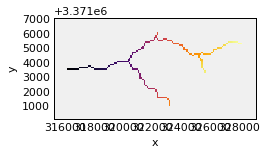

In [3]:
import numpy as np
import pandas as pd
import holoviews as hv
import geoviews as gv
import datashader as ds
import rasterio as rio
from holoviews.operation import contours
from holoviews.operation.datashader import datashade, aggregate
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno

#makes jupyter notebook screen wider
from IPython.core.display import HTML, display
display(HTML("<style>.container { width:80% !important; }</style>"))

#importing the data
name = "Mandakini_fullProfileMC_forced_0.45_3_1258909000_10_80_281_for_Arc.csv" #Set file name
path = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/" #Set path to data
df = pd.read_csv(path+name)
newpath = '/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/'
raster_data = rio.open(newpath+'Mandakini.bil')




hv.notebook_extension()

dataset = gv.Dataset(df, kdims=['x', 'y'], vdims=['elevation', 'chi', 'flow_distance'])
shade_defaults = dict(x_range=x_range, y_range=y_range, x_sampling=100, y_sampling=100, width=1200, height=660)

shaded = datashade(hv.Points(dataset),  cmap=inferno, aggregator=ds.mean('elevation'), **shade_defaults)

shaded



#

In [2]:
#to define boundaries of the plot area, default is adding on 1 km to easting and northing
def define_boundaries(df, r=1000):
    xmin = df['x'].min()
    xmax = df['x'].max()
    ymin =df['y'].min()
    ymax = df['y'].max()
    x_range = (xmin-r, xmax+r)
    y_range = (ymin-r, ymax+r)
    return x_range, y_range

x_range, y_range = define_boundaries(df, 1000)

In [23]:
hv.Image(raster_data)

ValueError: None of the available storage backends were able to support the supplied data format.